In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
pd.options.mode.chained_assignment = None
from tabulate import tabulate
from matplotlib import cm
from mpl_toolkits import mplot3d

## A function to take all the images

In [2]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

In [3]:
class1 = load_images(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\Image_Group30\train\bayou")
class2 = load_images(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\Image_Group30\train\bayou")
class3 = load_images(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\Image_Group30\train\creek")

In [4]:
len(class1)

50

## A function to find patch of images


In [5]:
def patch_finder(directory):
    list_patch_images = []
    for i in directory:
        list_patch = []
        for j in range(0,i.shape[0],32):
            for k in range(0,i.shape[1],32):
                list_patch.append(i[j:j+32,k:k+32,:])
        list_patch_images.append(list_patch)
    return list_patch_images

In [6]:
list_class1_patch = patch_finder(class1)
list_class2_patch = patch_finder(class2)
list_class3_patch = patch_finder(class3)

In [7]:
len(list_class1_patch[10])

7854

## A function to calculate the histogram

In [8]:
def calculate_hist(image,bins):
    hr = cv2.calcHist([image],[0],None,[bins],[0,256])
    hg = cv2.calcHist([image],[1],None,[bins],[0,256])
    hb = cv2.calcHist([image],[2],None,[bins],[0,256])
    clr_hist = np.vstack((hr,hg,hb))
    return clr_hist

In [9]:
# all the training class vectors to be taken

train_hist = []
for i in list_class1_patch:
    for j in i:
        train_hist.append(calculate_hist(j,8))
        
for i in list_class2_patch:
    for j in i:
        train_hist.append(calculate_hist(j,8))
        
for i in list_class3_patch:
    for j in i:
        train_hist.append(calculate_hist(j,8))

In [10]:
train_hist_ar = np.array(train_hist)

In [11]:
train_hist_ar = train_hist_ar.reshape((262907,24))

## Making a data frame out of all the vectors(vectors represented as rows)

In [12]:
dataframe_train = pd.DataFrame(train_hist_ar)

In [13]:
dataframe_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,...,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,...,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,...,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,...,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,...,0.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262902,0.0,0.0,0.0,77.0,841.0,106.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15.0,543.0,454.0,12.0,0.0,0.0
262903,0.0,0.0,25.0,157.0,648.0,192.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76.0,386.0,543.0,19.0,0.0,0.0
262904,0.0,0.0,4.0,238.0,697.0,72.0,13.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,12.0,690.0,300.0,19.0,3.0,0.0
262905,0.0,0.0,0.0,215.0,763.0,46.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,452.0,562.0,7.0,0.0,0.0


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=32)
kmeans.fit(train_hist_ar)

KMeans(n_clusters=32)

In [15]:
cluster_centre = kmeans.cluster_centers_

In [16]:
kmeans.labels_.shape

(262907,)

In [17]:
dataframe_train['cluster'] = kmeans.labels_

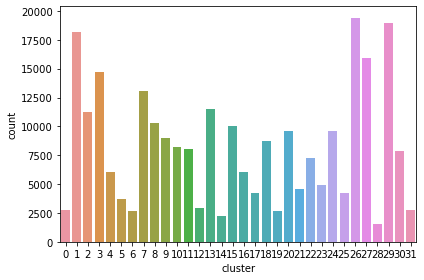

In [18]:
sns.countplot(dataframe_train.cluster)
plt.tight_layout()

## Making 32-dimensional vector representation of each image

In [19]:
## For class 1 images
class1_images_clr_histograms = []
for i in list_class1_patch:
    complete_image = []
    for j in i:
        clr_hst = calculate_hist(j,8)
        clr_hst = clr_hst.reshape(1,-1)
        pr = kmeans.predict(clr_hst)
        complete_image.append(pr)
    class1_images_clr_histograms.append(complete_image)
    

class2_images_clr_histograms = []
for i in list_class2_patch:
    complete_image = []
    for j in i:
        clr_hst = calculate_hist(j,8)
        clr_hst = clr_hst.reshape(1,-1)
        pr = kmeans.predict(clr_hst)
        complete_image.append(pr)
    class2_images_clr_histograms.append(complete_image)
    
class3_images_clr_histograms = []
for i in list_class3_patch:
    complete_image = []
    for j in i:
        clr_hst = calculate_hist(j,8)
        clr_hst = clr_hst.reshape(1,-1)
        pr = kmeans.predict(clr_hst)
        complete_image.append(pr)
    class3_images_clr_histograms.append(complete_image)

## demonstration of 32 dimensional on a example

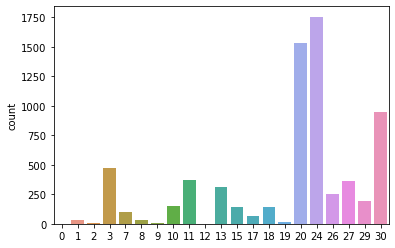

In [20]:
sns.countplot(np.array(class3_images_clr_histograms[49]).ravel())

## Conversion into 32 dim vectors

In [21]:
## class1
class_1_32dim = []
for i in class1_images_clr_histograms:
    dim_rep = []
    for j in range(32):
        dim_rep.append(i.count(j))
    class_1_32dim.append(dim_rep)
        
        
## class2
class_2_32dim = []
for i in class2_images_clr_histograms:
    dim_rep = []
    for j in range(32):
        dim_rep.append(i.count(j))
    class_2_32dim.append(dim_rep)
    
## class3
class_3_32dim = []
for i in class3_images_clr_histograms:
    dim_rep = []
    for j in range(32):
        dim_rep.append(i.count(j))
    class_3_32dim.append(dim_rep)

## forming a Dataframe of train images

In [22]:
arr_32_cl1 = np.array(class_1_32dim)
arr_32_cl1 = np.hstack((arr_32_cl1,np.ones((50,1))))

In [23]:
arr_32_cl2 = np.array(class_2_32dim)
arr_32_cl2 = np.hstack((arr_32_cl2,2*np.ones((50,1))))

In [24]:
arr_32_cl3 = np.array(class_3_32dim)
arr_32_cl3 = np.hstack((arr_32_cl3,3*np.ones((50,1))))

In [25]:
train_32_dim = np.vstack((arr_32_cl1,arr_32_cl2,arr_32_cl3)).astype('uint')

In [26]:
train_32_frame = pd.DataFrame(train_32_dim)

In [27]:
train_32_frame = train_32_frame.rename(columns={32:"Label"})
train_32_frame

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,0,10,0,69,0,9,7,120,0,0,...,0,313,0,95,13,0,10,50,0,1
1,0,82,1,0,0,11,0,0,0,0,...,0,21,0,56,75,0,116,74,0,1
2,10,82,125,13,12,0,0,454,12,362,...,60,0,39,3,0,0,258,5,0,1
3,15,50,105,16,0,39,40,56,51,65,...,0,1,27,5,1,0,40,26,0,1
4,1,122,11,86,0,61,119,0,66,18,...,0,78,529,222,119,0,98,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,191,22,235,0,8,17,117,0,0,...,0,19,1,225,21,0,8,6,0,3
146,0,111,120,113,44,0,0,75,0,0,...,2,7,0,39,22,0,51,14,0,3
147,0,337,214,62,0,0,0,48,0,277,...,0,205,0,213,272,0,386,51,0,3
148,0,28,0,26,0,0,0,5,0,0,...,0,3,0,11,1,0,1,0,0,3


## Preparing the test dataframe also and converting into the 32 dimensional vectors

In [28]:
class1_test = load_images(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\Image_Group30\test\bayou")
class2_test = load_images(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\Image_Group30\test\chalet")
class3_test = load_images(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\Image_Group30\test\creek")

In [29]:
list_class1_patch_test = patch_finder(class1_test)
list_class2_patch_test = patch_finder(class2_test)
list_class3_patch_test = patch_finder(class3_test)

In [30]:
## For class 1 images
class1_images_clr_histograms_test = []
for i in list_class1_patch_test:
    complete_image = []
    for j in i:
        clr_hst = calculate_hist(j,8)
        clr_hst = clr_hst.reshape(1,-1)
        pr = kmeans.predict(clr_hst)
        complete_image.append(pr)
    class1_images_clr_histograms_test.append(complete_image)
    

class2_images_clr_histograms_test = []
for i in list_class2_patch_test:
    complete_image = []
    for j in i:
        clr_hst = calculate_hist(j,8)
        clr_hst = clr_hst.reshape(1,-1)
        pr = kmeans.predict(clr_hst)
        complete_image.append(pr)
    class2_images_clr_histograms_test.append(complete_image)
    
class3_images_clr_histograms_test = []
for i in list_class3_patch_test:
    complete_image = []
    for j in i:
        clr_hst = calculate_hist(j,8)
        clr_hst = clr_hst.reshape(1,-1)
        pr = kmeans.predict(clr_hst)
        complete_image.append(pr)
    class3_images_clr_histograms_test.append(complete_image)

In [31]:
## class1
class_1_32dim_test = []
for i in class1_images_clr_histograms_test:
    dim_rep = []
    for j in range(32):
        dim_rep.append(i.count(j))
    class_1_32dim_test.append(dim_rep)
        
        
## class2
class_2_32dim_test = []
for i in class2_images_clr_histograms_test:
    dim_rep = []
    for j in range(32):
        dim_rep.append(i.count(j))
    class_2_32dim_test.append(dim_rep)
    
## class3
class_3_32dim_test = []
for i in class3_images_clr_histograms_test:
    dim_rep = []
    for j in range(32):
        dim_rep.append(i.count(j))
    class_3_32dim_test.append(dim_rep)

## Forming a data frame of the test images

In [32]:
arr_32_cl1_test = np.array(class_1_32dim_test)
arr_32_cl1_test = np.hstack((arr_32_cl1_test,np.ones((50,1))))

In [33]:
arr_32_cl2_test = np.array(class_2_32dim_test)
arr_32_cl2_test = np.hstack((arr_32_cl2_test,np.ones((50,1))))

In [34]:
arr_32_cl3_test = np.array(class_3_32dim_test)
arr_32_cl3_test = np.hstack((arr_32_cl3_test,np.ones((50,1))))

In [35]:
test_32_dim = np.vstack((arr_32_cl1_test,arr_32_cl2_test,arr_32_cl3_test)).astype('uint')

In [36]:
test_32_frame = pd.DataFrame(test_32_dim)

In [52]:
test_32_frame = test_32_frame.rename(columns={32:"Label"})
test_32_frame

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,5,185,438,336,0,0,0,0,5,357,...,0,687,0,349,98,0,280,0,0,1
1,2,23,3,5,0,0,0,0,0,4,...,0,2,2,7,4,0,12,0,0,1
2,0,323,109,173,45,4,1,32,0,16,...,13,43,3,267,48,0,234,71,0,1
3,0,31,19,1,0,0,0,69,0,8,...,0,0,0,16,0,0,21,83,0,1
4,19,32,33,19,64,50,29,43,128,0,...,237,7,20,25,4,0,10,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,291,195,88,0,0,4,7,0,11,...,0,2,0,82,18,0,103,2,0,1
146,0,17,0,13,0,0,0,0,0,0,...,0,6,0,37,7,0,0,0,5,1
147,0,177,25,474,933,30,15,0,26,19,...,325,220,1,720,211,0,124,88,0,1
148,0,560,149,39,0,0,0,13,0,22,...,0,0,0,14,2,0,22,0,0,1


## Designing a neural network to do above task

In [95]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    #return sigmoid(x)*(1-sigmoid(x))
    return x*(1-x)

def neural_network(data,label,neuron_hidden,hidden2):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    hidden = neuron_hidden
    hidden2 = hidden2
    weight_1 = np.random.rand(features+1,hidden)
    weight_2 = np.random.rand(hidden+1,hidden2)
    weight_3 = np.random.rand(hidden2+1,label.shape[1])
    
    
    epoch = 0
    epoch_error = []
    while epoch<5000:
        epoch+=1
        
        #feedforward
        feed_1 = np.dot(data,weight_1)
        feed_1_act = sigmoid(feed_1)
        feed_1_act = np.hstack((np.ones((feed_1_act.shape[0],1)),feed_1_act))
        
        
        feed_2 = np.dot(feed_1_act,weight_2)
        #feed_1_act = np.delete(feed_1_act,0,axis=1)
        feed_2_act = sigmoid(feed_2)
        feed_2_act = np.hstack((np.ones((feed_2_act.shape[0],1)),feed_2_act))
        
        feed_3 = np.dot(feed_2_act,weight_3)
        feed_3_act = sigmoid(feed_3)
        
        #backpropagation
        
        error = label-feed_3_act
        error_1 = np.sum(error, axis = 1)
        error_av = np.sum(error_1**2)/(2*samples)
        epoch_error.append((epoch,error_av))
        #error = error*(2/samples)
        
        slope_output_layer = sigmoid_der(feed_3_act)
        slope_hidden_layer_2 = sigmoid_der(feed_2_act)
        slope_hidden_layer_1 = sigmoid_der(feed_1_act)

        #slope_hidden_layer_1 = np.hstack((np.ones((slope_hidden_layer_1.shape[0],1)),slope_hidden_layer_1))
        
        
        
        delta_output = np.multiply(error,slope_output_layer)
        error_hidden_2 = np.dot(delta_output,weight_3.T)
        #error_hidden = np.delete(error_hidden,0,axis=1)
        
        delta_hidden_2 = np.multiply(error_hidden_2,slope_hidden_layer_2)
        delta_hidden_2 = np.delete(delta_hidden_2,0,axis=1)
        error_hidden_1 = np.dot(delta_hidden_2,weight_2.T)
        
        
        delta_hidden_1 = np.multiply(error_hidden_2,slope_hidden_layer_1)
        delta_hidden_1 = np.delete(delta_hidden_1,0,axis=1)
               
        weight_3 += 0.1*np.dot(feed_2_act.T,delta_output) 
                                   
        weight_2 += 0.1*np.dot(feed_1_act.T,delta_hidden_2)
        #bias_3 += 0.1*np.sum(delta_output,axis=0,keepdims = True)
        
        weight_1 += 0.1*np.dot(data.T, delta_hidden_1)
        #bias_1 += 0.1*np.sum(delta_hidden_1,axis=0, keepdims=True)

    
    return weight_1, weight_2,weight_3,epoch_error
    
        

In [96]:
def predict(data,w1,w2,w3):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    #feedforward
    feed_1 = np.dot(data,w1)
    feed_1_act = sigmoid(feed_1)
    feed_1_act = np.hstack((np.ones((feed_1_act.shape[0],1)),feed_1_act))


    feed_2 = np.dot(feed_1_act,w2)
    #feed_1_act = np.delete(feed_1_act,0,axis=1)
    feed_2_act = sigmoid(feed_2)
    feed_2_act = np.hstack((np.ones((feed_2_act.shape[0],1)),feed_2_act))

    feed_3 = np.dot(feed_2_act,w3)
    feed_3_act = sigmoid(feed_3)

    out = feed_3_act.argmax(axis = 1)
    return out+1

In [97]:
def confuse(original,predicted,type_data):
    l_1_1 = 0
    l_1_2 = 0
    l_1_3 = 0
    l_2_1 = 0
    l_2_2 = 0
    l_2_3 = 0
    l_3_1 = 0
    l_3_2 = 0
    l_3_3 = 0
    for i in range(original.shape[0]):
        if original[i] ==1 and predicted[i] ==1:
            l_1_1+=1
        if original[i] ==1 and predicted[i] ==2:
            l_1_2+=1
        if original[i] ==1 and predicted[i] ==3:
            l_1_3+=1
        if original[i] ==2 and predicted[i] ==1:
            l_2_1+=1
        if original[i] ==2 and predicted[i] ==2:
            l_2_2+=1
        if original[i] ==2 and predicted[i] ==3:
            l_2_3+=1
        if original[i] ==3 and predicted[i] ==1:
            l_3_1+=1
        if original[i] ==3 and predicted[i] ==2:
            l_3_2+=1
        if original[i] ==3 and predicted[i] ==3:
            l_3_3+=1

    table = [[" ","Class 1","Class 2","Class 3"],["Class 1", l_1_1,l_1_2,l_1_3],["Class 2", l_2_1,l_2_2,l_2_3],["Class 3",l_3_1,l_3_2,l_3_3]]
    print(f"Confusion Matrix for {type_data} Data ")
    print(tabulate(table))
    print("\n")
    print(f"The Classification accuracy for {type_data} data is ")
    acc =  (l_1_1+l_2_2+l_3_3)/(l_1_1+l_1_2+l_1_3+l_2_1+l_2_2+l_2_3+l_3_1+l_3_2+l_3_3)
    print(acc)

## One hot encoding of train frame

In [98]:
train_32_frame['l1'] = 0
train_32_frame['l2'] = 0
train_32_frame['l3'] = 0

train_32_frame.l1[train_32_frame.Label==1] = 1
train_32_frame.l2[train_32_frame.Label==2] = 1
train_32_frame.l3[train_32_frame.Label==3] = 1

In [99]:
## Shuffling the data before applying to training process

train_32_frame = train_32_frame.sample(frac=1)

In [100]:
train_32_frame

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,Label,l1,l2,l3
57,2,124,0,468,1,5,0,89,0,28,...,623,750,0,145,132,0,2,0,1,0
76,2,54,17,2,143,58,0,466,0,47,...,111,189,0,140,8,0,2,0,1,0
133,1,45,3,14,0,1,0,0,0,0,...,30,0,0,1,0,0,3,0,0,1
112,0,8,0,16,0,0,0,0,0,1,...,11,0,0,21,37,0,3,0,0,1
46,27,76,68,181,9,0,0,137,237,70,...,29,24,0,87,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,231,92,21,0,0,0,0,0,0,...,226,35,0,44,25,0,3,0,0,1
71,13,134,69,255,285,34,31,816,78,15,...,75,74,0,82,61,0,2,0,1,0
130,0,16,6,0,0,0,0,0,0,0,...,19,11,0,15,1,0,3,0,0,1
124,0,179,661,19,0,12,2,0,0,107,...,174,328,0,577,331,19,3,0,0,1


In [101]:
w_train_1, w_train_2,w_train_3, error_epoch_train= neural_network(np.array(train_32_frame.iloc[:,:32]),np.array(train_32_frame[['l1','l2','l3']]),50,50)

In [102]:
training_result = predict(np.array(train_32_frame.iloc[:,:32]),w_train_1,w_train_2,w_train_3)

In [103]:
train_32_frame['predicted'] = training_result

In [104]:
train_32_frame

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,Label,l1,l2,l3,predicted
57,2,124,0,468,1,5,0,89,0,28,...,750,0,145,132,0,2,0,1,0,2
76,2,54,17,2,143,58,0,466,0,47,...,189,0,140,8,0,2,0,1,0,2
133,1,45,3,14,0,1,0,0,0,0,...,0,0,1,0,0,3,0,0,1,2
112,0,8,0,16,0,0,0,0,0,1,...,0,0,21,37,0,3,0,0,1,2
46,27,76,68,181,9,0,0,137,237,70,...,24,0,87,2,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,231,92,21,0,0,0,0,0,0,...,35,0,44,25,0,3,0,0,1,2
71,13,134,69,255,285,34,31,816,78,15,...,74,0,82,61,0,2,0,1,0,2
130,0,16,6,0,0,0,0,0,0,0,...,11,0,15,1,0,3,0,0,1,2
124,0,179,661,19,0,12,2,0,0,107,...,328,0,577,331,19,3,0,0,1,2


## Confusion matrix of training data

In [105]:
original = np.array(train_32_frame.Label)
predicted = np.array(train_32_frame.predicted)
confuse(original,predicted,"Training")

Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  0        50       0
Class 2  0        50       0
Class 3  0        50       0
-------  -------  -------  -------


The Classification accuracy for Training data is 
0.3333333333333333


## Confusion matrix of test data

In [106]:
test_32_frame

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,5,185,438,336,0,0,0,0,5,357,...,0,687,0,349,98,0,280,0,0,1
1,2,23,3,5,0,0,0,0,0,4,...,0,2,2,7,4,0,12,0,0,1
2,0,323,109,173,45,4,1,32,0,16,...,13,43,3,267,48,0,234,71,0,1
3,0,31,19,1,0,0,0,69,0,8,...,0,0,0,16,0,0,21,83,0,1
4,19,32,33,19,64,50,29,43,128,0,...,237,7,20,25,4,0,10,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,291,195,88,0,0,4,7,0,11,...,0,2,0,82,18,0,103,2,0,1
146,0,17,0,13,0,0,0,0,0,0,...,0,6,0,37,7,0,0,0,5,1
147,0,177,25,474,933,30,15,0,26,19,...,325,220,1,720,211,0,124,88,0,1
148,0,560,149,39,0,0,0,13,0,22,...,0,0,0,14,2,0,22,0,0,1


In [107]:
test_result = predict(np.array(test_32_frame.iloc[:,:32]),w_train_1,w_train_2,w_train_3)

In [108]:
original = np.array(test_32_frame.Label)
confuse(original,test_result,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  0        150      0
Class 2  0        0        0
Class 3  0        0        0
-------  -------  -------  -------


The Classification accuracy for Testing data is 
0.0
